# In class - 7

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import json

## Making a class for events
Today we will focus on making a specialised class to detect action potentials and allow us some plotting and analysis. These classes could be extended in their functionality depending on your requirements.

### Load json file with characterisation
The file we will use is the same experiment you used before. The data can be loaded as dictionary from the json file. With this code snipped we also convert the traces which are originally a list to a numpy array.

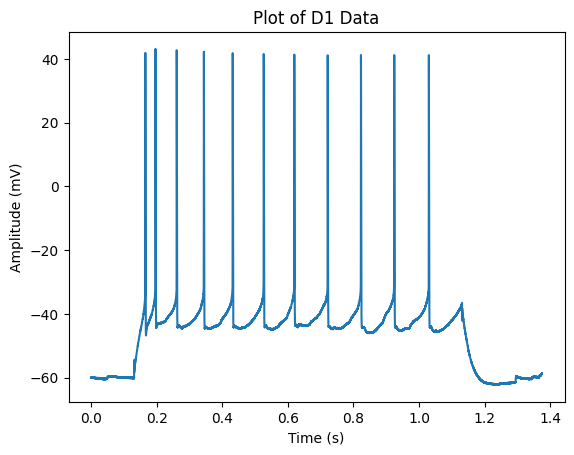

In [3]:
# check that you have the right path to the data
with open('/home/daniel/Work/Teaching/schmitzlab_python/data/charact_data.json') as f:
    data = json.load(f)
data = {key: np.array(data[key]) for key in data.keys()}
# get the time vector
time = np.arange(len(data['D1'][0])) / 20000
plt.plot(time, data['D1'][10])
plt.title('Plot of D1 Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()

Another piece of information we might be interested is the injected current (today optional).

In [4]:
current_inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]

Let's take a look at what the `find_peaks` function does.

In [8]:
peaks_location, peak_properties = signal.find_peaks(data['D1'][10], height=0)
peaks_location, peak_properties

(array([ 3310,  3927,  5223,  6880,  8638, 10530, 12395, 14431, 16460,
        18490, 20600]),
 {'peak_heights': array([41.90673828, 43.1640625 , 42.75512695, 42.2668457 , 41.82739258,
         41.56494141, 41.37573242, 41.16210938, 41.25366211, 41.24145508,
         41.21704102])})

Make a new class which takes the sweep and sampling rate to be initiated but then extracts the action potentials into an array with dimenstions (AP count, 80). This array should be filled with action potentials from the sweep. We also want the difference of the action potentials in time to make a polar plot. 

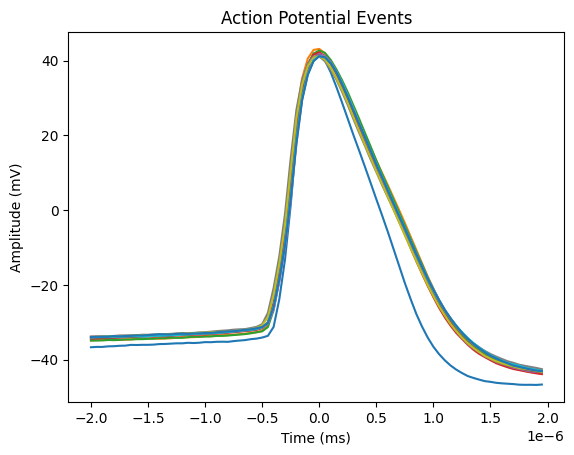

In [ ]:
class APs:
    def __init__(self, sweep, sampling_rate=20000):
        self.sweep = sweep
        self.time = np.arange(len(sweep)) / sampling_rate
        self.sampling_rate = sampling_rate
        self.find_peaks()
        self.peak_location = self.time[self.index]
        self.events = np.full((len(self.index),80), fill_value=np.nan)
        
        for i, peak in enumerate(self.index):
            if peak > 40 and peak < len(sweep) - 40:
                self.events[i] = sweep[peak-40:peak+40]
        self.difference = np.diff(self.events, axis=1, prepend=np.nan)
    def find_peaks(self):
        self.index, _ = signal.find_peaks(self.sweep, height=0)

    def plot(self):
        ap_time = (np.arange(80)-40) / self.sampling_rate / 1000
        plt.plot(ap_time, self.events.T)
        plt.title('Action Potential Events')
        plt.xlabel('Time (ms)')
        plt.ylabel('Amplitude (mV)')
        plt.show()
    def plot_diff(self):
        plt.plot(self.events.T, self.difference.T)
        plt.title('Polar Plot of Action Potential Events')
        plt.xlabel('Amplitude (mV)')
        plt.ylabel('Difference (mV)')
        plt.show()
ap_from_sweep = APs(data['D1'][10])
ap_from_sweep.plot()

Now use your class in a loop to add append `action_potentials`.
Then plot the polar plot of the sweep with the most action potentials.

Found 0 action potentials in sweep 0
Found 0 action potentials in sweep 1
Found 0 action potentials in sweep 2
Found 0 action potentials in sweep 3
Found 0 action potentials in sweep 4
Found 0 action potentials in sweep 5
Found 0 action potentials in sweep 6
Found 1 action potentials in sweep 7
Found 5 action potentials in sweep 8
Found 8 action potentials in sweep 9
Found 11 action potentials in sweep 10
Found 15 action potentials in sweep 11
[<__main__.APs object at 0x7f721ff96380>, <__main__.APs object at 0x7f71c9f40ee0>, <__main__.APs object at 0x7f71c7b10610>, <__main__.APs object at 0x7f71c5142440>, <__main__.APs object at 0x7f71c71ed750>, <__main__.APs object at 0x7f71c7195150>, <__main__.APs object at 0x7f72136b7610>, <__main__.APs object at 0x7f72100dbf70>, <__main__.APs object at 0x7f71c7afe410>, <__main__.APs object at 0x7f71c7195330>, <__main__.APs object at 0x7f721ff64910>, <__main__.APs object at 0x7f71c5b2b370>]


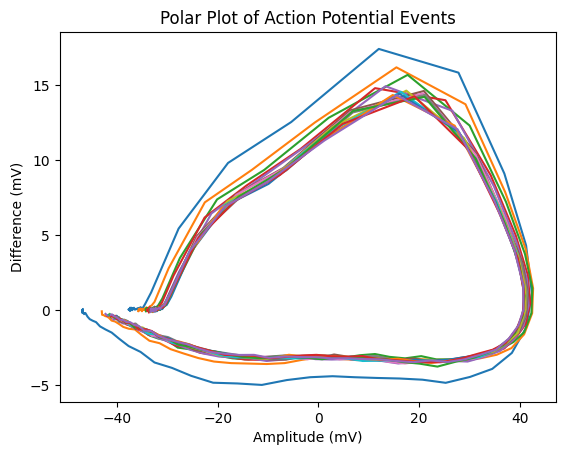

In [27]:
action_potentials = []
data['D1']
for sweep_index, sweep in enumerate(data['D1']):
    action_potentials.append(APs(sweep))
    print(f'Found {len(action_potentials[-1].index)} action potentials in sweep {sweep_index}')

print(action_potentials)
action_potentials[11].plot_diff()

Bonus:
Can you imagine to make a new class for the whole current injection? What could be used and how would you add the extracted action potentials to your new class.